In [2]:
import pandas as pd

In [3]:
wikipedia = pd.read_csv('../Class_Data/wikipedia.csv')

In [5]:
wikipedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876 entries, 0 to 3875
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Vandalism        3876 non-null   object
 1   MinorEdit        3876 non-null   object
 2   LoggedIn         3876 non-null   object
 3   HTTP             3876 non-null   object
 4   NumWordsAdded    3876 non-null   int64 
 5   NumWordsRemoved  3876 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 181.8+ KB


In [10]:
# Data preprocess
yes_no_column = ['Vandalism', 'MinorEdit', 'LoggedIn', 'HTTP']
for c in yes_no_column:
    wikipedia[c] = wikipedia[c].map(lambda x: 1 if x == 'Yes' else 0)

In [11]:
features = ['MinorEdit', 'LoggedIn', 'HTTP', 'NumWordsAdded', 'NumWordsRemoved']
X = wikipedia[features].values
y = wikipedia['Vandalism'].values

In [12]:
X, y

(array([[ 1,  1,  1, 96,  0],
        [ 1,  1,  0,  3,  1],
        [ 0,  1,  0,  0,  4],
        ...,
        [ 0,  1,  0,  0,  0],
        [ 0,  0,  0,  4,  0],
        [ 0,  0,  0,  0,  1]], shape=(3876, 5)),
 array([0, 0, 0, ..., 1, 1, 1], shape=(3876,)))

In [8]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
)

model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [16]:
import matplotlib.pyplot as plt

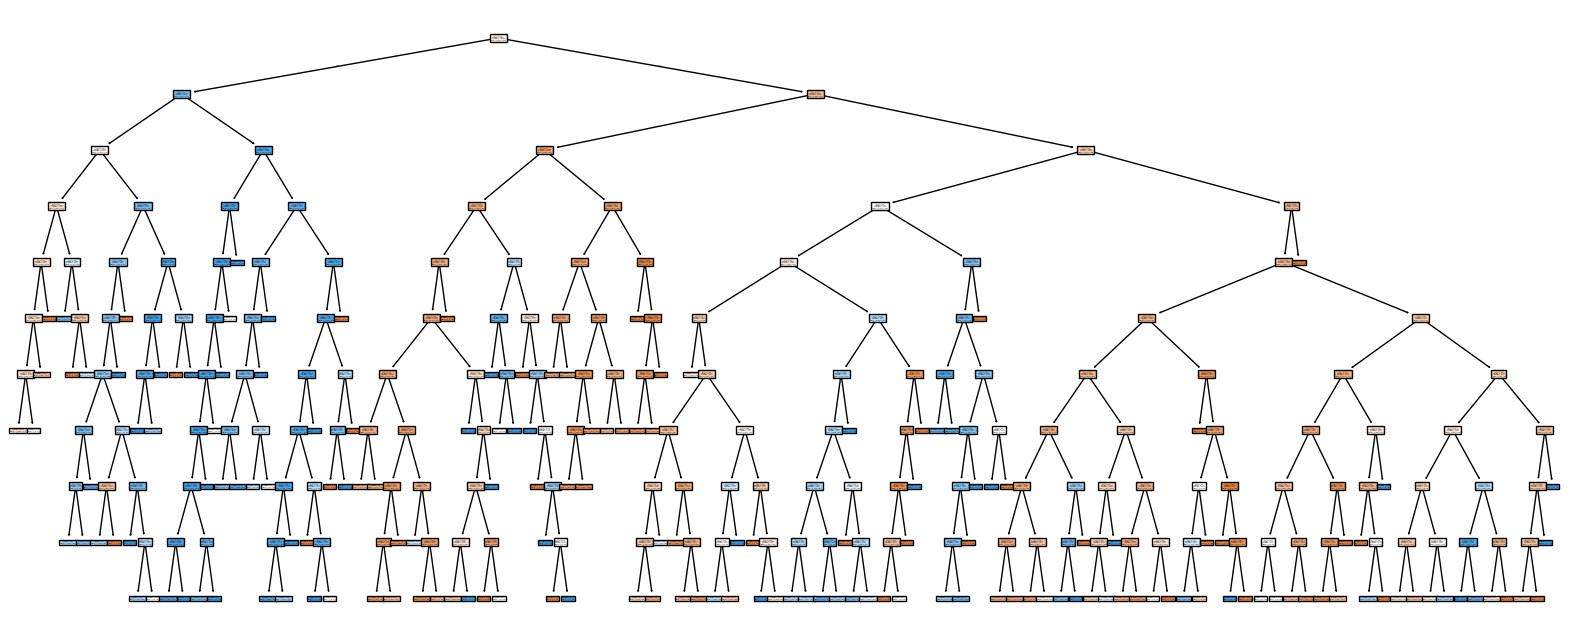

In [18]:
plt.figure(figsize=(20, 8))
tree.plot_tree(model, proportion=True, filled=True)
plt.show()

In [26]:
print('Accuracy:', model.score(X, y))
print('Classification Error:', 1-model.score(X, y))

Accuracy: 0.7634158926728586
Classification Error: 0.2365841073271414


### Confusion Matrix <br>
[TN, FP] <br>
[FN, TP]

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X)

# Note, when you build this confusion matrix, it sorts 0, 1
# So the value you calculate as recall is sensitivity
# Select all cases that need to be selected
w_m = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(w_m)
print("Predictive (x) Actual (y)")

Confusion Matrix:
[[1876  185]
 [ 732 1083]]
Predictive (x) Actual (y)


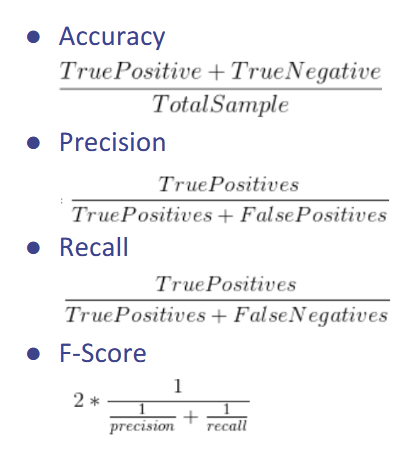

In [73]:
# How many records were marked correctly
print("Accuracy:", (w_m[0][0] + w_m[1][1])/sum(sum(w_m)))

# How many positive guesses are correct 
# The cost of false positives is high - Type 1
precision = w_m[1][1] / (w_m[1][1] + w_m[0][1])
print("Precision:", precision)

# How many positive labels were guessed correct by the model
# The cost of false negatives is high - Type 2
recall = w_m[1][1] / (w_m[1][1] + w_m[1][0])
print("Recall:", recall)

# F-score, the trade off between the two
print("f1-Score:", 2*1/(1/precision + 1/recall))


Accuracy: 0.7634158926728586
Precision: 0.8541009463722398
Recall: 0.596694214876033
f1-Score: 0.7025624391826143


In [75]:
print(classification_report(y_true=y, y_pred=y_pred, 
                            labels=[1, 0], 
                            target_names=['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.85      0.60      0.70      1815
          No       0.72      0.91      0.80      2061

    accuracy                           0.76      3876
   macro avg       0.79      0.75      0.75      3876
weighted avg       0.78      0.76      0.76      3876



### Split the Data

In [77]:
from sklearn.model_selection import train_test_split
# By default, train_test_split does random shuffling
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1992
)

In [78]:
from sklearn import tree

In [79]:
model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_impurity_decrease=0.01,
    min_samples_leaf=10,
    min_samples_split=4
)

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01,
                       min_samples_leaf=10, min_samples_split=4)

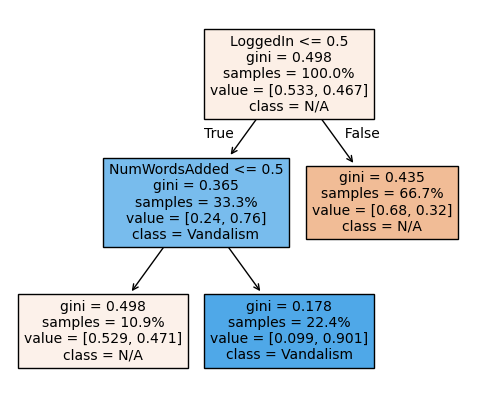

In [92]:
plt.figure(figsize=(6, 5))
tree.plot_tree(model, feature_names=features, filled=True, proportion=True, class_names=['N/A', 'Vandalism'])
plt.show()

In [94]:
print("Training Accuracy:", model.score(X=X_train, y=y_train))
print("Training Classification Error:", 1 - model.score(X=X_train, y=y_train))

Training Accuracy: 0.7128639882049392
Training Classification Error: 0.28713601179506076


In [96]:
print("Testing Accuracy:", model.score(X=X_test, y=y_test))
print("Testing Classification Error:", 1 - model.score(X=X_test, y=y_test))

Testing Accuracy: 0.7265692175408427
Testing Classification Error: 0.2734307824591573


### Use K-fold Cross Validation for Model Evaluation

In [128]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k = 8
cv = KFold(
    n_splits=k,
    shuffle=True,
    random_state=1992
    )

# Model is fit during every fold and list is returned
scores = cross_val_score(model, X_train, y_train, cv=cv)
print(f"Mean Training Accuracy: {np.mean(scores):.8f}")
print(f"Training Standard Deviation: {np.std(scores):.8f}")

print("Test Accuracy:", model.fit(X_train, y_train).score(X_test, y_test))

Mean Training Accuracy: 0.71285789
Training Standard Deviation: 0.02619495
Test Accuracy: 0.7265692175408427


### Hyper Parameter Tuning

In [130]:
# View all the current parameters of a model this way
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## We need to define the following:
1. Our parameter space <br>
2. A method for searching or sampling candidates <br>
<tab> GridSearch CV searches all <br> </tab>
RandomizedSearchCV samples a parameter space <br>
You can search the repeated halving (log(m) reductions) <br>
Using HalvingGridSearchCV or HalvingRandomSearchCV <br>
3. A cross-validation scheme <br>
4. A score function <br>

In [192]:
# Split the data into three partitions now
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.8
)

In [242]:
from sklearn.model_selection import GridSearchCV

# Attempt to use all criteria
# Max depth from 2-10
# Min_samples_leafs 5-10-20-30-50
# Use accuracy as a score method

decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=28,
    min_impurity_decrease=0.001
)

parameters = {
    'min_samples_split': [i for i in range(2, 13, 2)]
}

# By default
# Refit will fit the model with the best params upon termination
# Uses 5 fold cv unless otherwise stated
#     Can also input a CV splitter (Statified, Group, etc)
clf = GridSearchCV(
    estimator=decision_tree, 
    param_grid=parameters, 
    scoring='accuracy',
    cv=5,
    # verbose=3,
)

# Hyperparameter testing
print("Hyperparameter Search:")
clf.fit(X_train, y_train)

print("\nBest Parameters:")
for k,v in clf.best_params_.items():
    print(k, ': ', v, sep="")

print("\nBest Scores:", clf.best_score_)

# How good is the model
print("\nTest Accuracy:", clf.score(X_test, y_test))

Hyperparameter Search:

Best Parameters:
min_samples_split: 2

Best Scores: 0.7270967741935483

Test Accuracy: 0.7319587628865979


In [243]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Not Vandalized', 'Vandalized']))

Confusion Matrix:
[[394  33]
 [175 174]]
                precision    recall  f1-score   support

Not Vandalized       0.69      0.92      0.79       427
    Vandalized       0.84      0.50      0.63       349

      accuracy                           0.73       776
     macro avg       0.77      0.71      0.71       776
  weighted avg       0.76      0.73      0.72       776



Model is good at predicting negatives, but its a 50/50 when predicting positives, hence the low sensitivity but fairly high specificity.<br>
However, this model does have high precision in the vandalized prediction, meaning that the amount of type 1 errors, is minimized, as there are not many false positives.

## Threshold Tuning

In [241]:
from sklearn.model_selection import TunedThresholdClassifierCV

metrics = ['accuracy', 'balance_accuracy', 
        #    'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc'
           ]

for metric in metrics:
    print(f"\nMetric = {metric}")
    print("------------------")

    tuned_model = TunedThresholdClassifierCV(
        estimator=clf,
        scoring='accuracy',
        cv=0.3, # The size of the validation set
    ).fit(X_train, y_train)

    print(f"Optimal Threshold for training data found at {tuned_model.best_threshold_:0.4f}")

    print("Accuracy:", tuned_model.score(X_test, y_test))

    y_pred = tuned_model.predict(X_test)
    print(f"\nClassification Report Tuned for {metric}:")
    print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['Not Vandalized', 'Vandalized']))


Metric = accuracy
------------------
Optimal Threshold for training data found at 0.4688
Accuracy: 0.7319587628865979

Classification Report Tuned for accuracy:
                precision    recall  f1-score   support

Not Vandalized       0.69      0.92      0.79       427
    Vandalized       0.84      0.50      0.63       349

      accuracy                           0.73       776
     macro avg       0.77      0.71      0.71       776
  weighted avg       0.76      0.73      0.72       776


Metric = balance_accuracy
------------------
Optimal Threshold for training data found at 0.4668
Accuracy: 0.7319587628865979

Classification Report Tuned for balance_accuracy:
                precision    recall  f1-score   support

Not Vandalized       0.69      0.92      0.79       427
    Vandalized       0.84      0.50      0.63       349

      accuracy                           0.73       776
     macro avg       0.77      0.71      0.71       776
  weighted avg       0.76      0.73    

### Misclassification Costs

Accuracy: 0.7523645743766122
Misclassification Cost: -1232
Confusion Matrix


<Figure size 600x600 with 0 Axes>

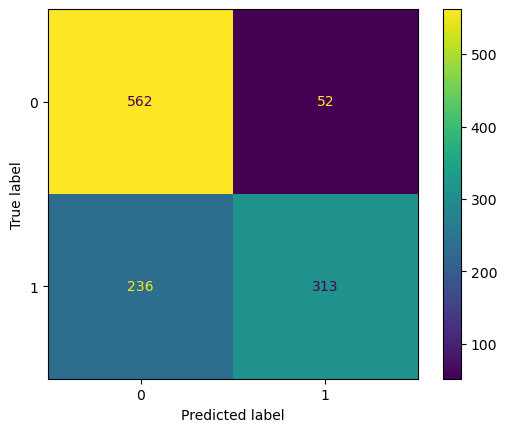

In [272]:
# To calculate the misclassification cost, 
# you create a gain matrix, specific to the cost (loss)
# of a FP or FN

# Here, we will use a make scorer to define a performance matrix based on these costs
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

pos_label, neg_label = 1, 0

def vandalism_cost(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    gain_matrix = np.array(
        [
            [0, -1],  # -1 gain for false positives
            [-5, 0],  # -5 gain for false negatives
        ]
    )
    return np.sum(cm * gain_matrix)

# Create our custom scorer, uses the cost of vandalism defined above
vandalism_score = make_scorer(vandalism_cost, neg_label=neg_label, pos_label=pos_label)

# Resplit our data for this experiment
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1992
)

# Define our model
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    min_impurity_decrease=0.001
)

# Hyperparameters
parameters = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [2] + [i for i in range(5, 36, 5)],
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30]
}

# Use HalvingGridSearch for fun
clf = HalvingGridSearchCV(
    estimator=decision_tree, 
    param_grid=parameters, 
    factor=2,
    scoring=vandalism_score,
    cv=5,
).fit(X_train, y_train)

# Returns the model with the lowest misclassification Costs
best_model = clf.best_estimator_

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred))
print("Misclassification Cost:", vandalism_cost(y_test, y_pred, neg_label, pos_label))

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Classification Metrics

In [247]:
# Metrics can be found at sklearn.metrics https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score

# Accuracy is the number of correct predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

# By default it is normalized
print("Accuracy not Normalized:",
       accuracy_score(y_test, y_pred, normalize=False))

Accuracy: 0.7319587628865979
Accuracy not Normalized: 568.0


In [250]:
# Top-k Accuracy Score
from sklearn.metrics import top_k_accuracy_score

# Top K accuracy is not only interested when k = 1,
# which is what the accuracy metric is calculating
# Top k looks at the k highest predicted scores

for i in range(2, 4):
    print(f"Top k Acccuracy when k = {i}:",
        top_k_accuracy_score(y_test, y_pred, k=i))
    print(f"Not Normalized Top k when k = {i}:",
        top_k_accuracy_score(y_test, y_pred, normalize=False, k=i))
    
# Please note this metric is useless when using there are only two
# classifications, accuracy will return the same result

Top k Acccuracy when k = 2: 1.0
Not Normalized Top k when k = 2: 776
Top k Acccuracy when k = 3: 1.0
Not Normalized Top k when k = 3: 776


c:\Users\gusta\miniconda3\envs\gus\Lib\site-packages\sklearn\metrics\_ranking.py:2022: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
c:\Users\gusta\miniconda3\envs\gus\Lib\site-packages\sklearn\metrics\_ranking.py:2022: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
c:\Users\gusta\miniconda3\envs\gus\Lib\site-packages\sklearn\metrics\_ranking.py:2022: UndefinedMetricWarning: 'k' (3) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
c:\Users\gusta\miniconda3\envs\gus\Lib\site-packages\sklearn\metrics\_ranking.py:2022: UndefinedMetricWarning: 'k' (3) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


$$ \texttt{balanced-accuracy} = \frac{1}{2}\left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP}\right )$$

In [254]:
# Balanced accuracy is 1/n_classess
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy:",
      balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.7106419814391067


### Confusion Matrix With Visuals

<Figure size 600x600 with 0 Axes>

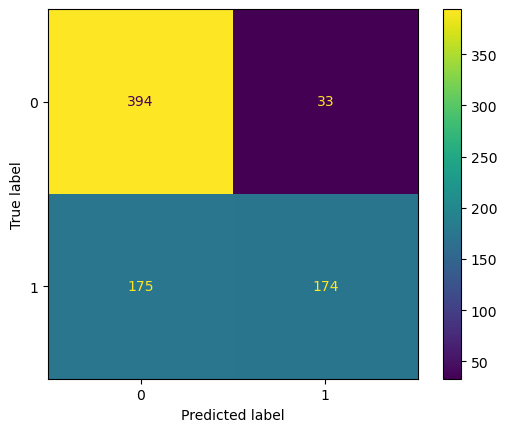

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
m = confusion_matrix(y_test, y_pred)
m

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=clf.classes_)
disp.plot()
plt.show()

### Precision-Recall Curve

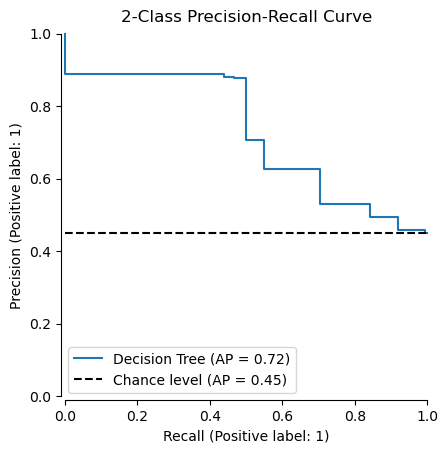

In [264]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Decision Tree",
    plot_chance_level=True, despine=True
)

_ = display.ax_.set_title("2-Class Precision-Recall Curve")

### ROC-AUC Curve

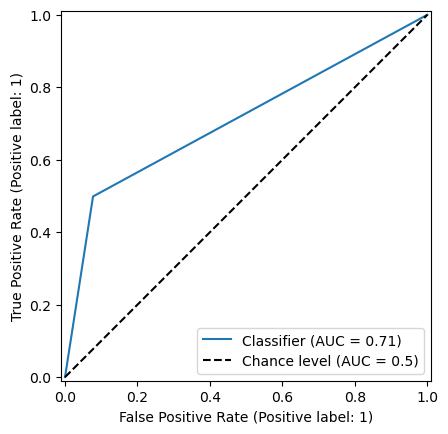

In [266]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred, plot_chance_level=True)